# Notebook I : Calibration with planes

The answer to each question is written below the code Cell concerned. For a Cell i and a question n,the answer will be in this format :<br> 
### Question n
This is the answer to the question n on the Cell i. 

## A. Calibraton with OpenCV 

Importing modules

In [3]:
from PIL import Image
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd
import cv2
import glob


# This is a value for the termination criterion of the subpixel corner localizer
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

Creation of the 3D point coordinates and loading images

In [20]:
# Here you have 3D points for the checkerboard (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Here you load the image files
images = glob.glob('left/left*.jpg')

Cell 1

In [5]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
print(len(images))
counter = 0 # counter that counts the images for which we found the corners. of the chessboard
valide_images = [] # a list that store the name of files for later usage.

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        counter+=1 
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(50)
        valide_images.append(fname)



cv2.destroyAllWindows()




13


### Question 1 

Cell 1 :

As the tutoriel suggested the 3D points are called object points and 2D image points are called image points.
So first of all we loop on all images in the left folder. Afterward, for each image we take the grayscale and then we use the function  cv2.findChessboardCorners(...) to find the corners in the chess board of that image. If the function found any, it returns true and stores that boolean value inside the variable ret.
Then Once we find the corners (if ret equals true), we can increase their accuracy using cv2.cornerSubPix() , then we store those corners inside our image points variable (2D image points)
And inside the object points variable we append the 3D points of corners in the chessboard. We fixed the dimension to be 6x7 so 42 points of corner in total.


Cell 2 : <br>
It returns the intrinsic matrix, distortion coefficients, rotation and translation vectors and finally (RMS) re-projection error, usually it should be between (0.1 and 1.0 pixels) in a good calibration.


Cell 2

In [21]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

#the rvec is a vector representing the rotation axis, and its length encodes the angle in radians to rotate. 
#the Rodrigues method turns such a rotation vector into a 3x3 matrix.

# in total we have 11 pictures the value of ret ~0.1 so we have a good calibration

# To find the rotation matrix for each picture we simply applies the rodriguez formula seen in TD2.

# once we have the rotation matrix of ONE rvecs vector(because rvecs is a vector of rotations vectors, for each of our
# 11 patenrs). We use the rodriguez formula to find the rotation matrix, and once we have it we add the translation
# vector (in tvecs which represtents a vector of translation vectors for each pattern/picture), to create our 
# extrinsic matrix for one pattern. And we rpeate this procedure for each of the 11 patterns



# tests


rotation_0,_ = cv2.Rodrigues(rvecs[0])
print("det rotation_0 =",np.linalg.det(rotation_0)) # it should be close to 1.
M_ext_0 = np.array(np.hstack((rotation_0,tvecs[0])),dtype=float)
M_camera_0 = np.dot(mtx, M_ext_0)
print(M_camera_0)

rotation_1,_= cv2.Rodrigues(rvecs[1])
print("det rotation_1 =",np.linalg.det(rotation_1))
M_ext_1 = np.array(np.hstack((rotation_1,tvecs[1])),dtype=float)
M_camera_1 =np.dot(mtx, M_ext_1)
print(M_camera_1)

rotation_2,_ = cv2.Rodrigues( rvecs[2])
print("det rotation_2 =",np.linalg.det(rotation_2))
M_ext_2 = np.array(np.hstack((rotation_2,tvecs[2])),dtype=float)
M_camera_2 = np.dot(mtx, M_ext_2)
print(M_camera_2)

rotation_3,_= cv2.Rodrigues(rvecs[3])
print("det rotation_3 =",np.linalg.det(rotation_3))
M_ext_3 = np.array(np.hstack((rotation_3,tvecs[3])),dtype=float)
M_camera_3 = np.dot(mtx, M_ext_3)
print(M_camera_3)

rotation_4,_ = cv2.Rodrigues(rvecs[4])
print("det rotation_4 =",np.linalg.det(rotation_4))
M_ext_4 = np.array(np.hstack((rotation_4,tvecs[4])),dtype=float)
M_camera_4 = np.dot(mtx, M_ext_4)
print(M_camera_4)
# ...




det rotation_0 = 1.0000000000000004
[[-4.20818148e+02 -6.11700780e+01  4.70156932e+02  7.10303538e+03]
 [ 4.45519202e+01 -5.64957870e+02  1.35590083e+02  3.94155712e+03]
 [ 2.71751068e-01 -1.63273781e-01  9.48416063e-01  1.48593055e+01]]
det rotation_1 = 0.9999999999999999
[[ 1.23637697e+02  5.10618942e+02  3.54766471e+02  2.06367529e+03]
 [-4.09585212e+02 -3.21169746e+01  4.13225596e+02  3.86361442e+03]
 [ 3.70962163e-01 -6.45998576e-02  9.26398366e-01  1.05769926e+01]]
det rotation_2 = 0.9999999999999999
[[-3.18859623e+02  4.44216282e+02  3.20745489e+02  4.69952348e+03]
 [-5.52336834e+02 -1.77080640e+02 -5.57979247e+01  5.53183156e+03]
 [-4.50603040e-01 -1.85169023e-01  8.73309414e-01  1.56731179e+01]]
det rotation_3 = 0.9999999999999999
[[ 1.54859915e+02 -6.09317938e+02  8.14081749e+01  5.22599903e+03]
 [ 5.66922600e+02  3.10281350e+01  1.31083786e+02  6.24230476e+02]
 [ 2.24799463e-01 -3.83718847e-01  8.95670167e-01  1.24572852e+01]]
det rotation_4 = 0.9999999999999998
[[-1.7187674

### Question 2 
It uses a simple intrinsic calibration method, because it uses the intrinsic A, and also the rotation and translation that describe the change of coordinates from world to camera coordinate systems.
The camera intrinsic matrix A projects 3D points given in the camera coordinate system to 2D pixel coordinates, i.e. p=APc. And what we pass to the method are actually those pixels “imgpoints”.
Retrieving the camera resolution in pixels px and py, is the first condition of the simple intrinsic calibration method.


### Question 3
The first three parameters are ret, mtx and dist.
<li>ret (RMS) re-projection error, usually it should be between 0.1 and 1.0 pixels in a good calibration. It is the rate of precision of the calibration if this value is close to 0 this will mean that we have a perfect calibration of our camera (in our case it’s around 0.1 so we can say that we have a good calibration). This is why they use 13 images in the tutorial. </li>
<li>Mtx is referred to the camera intrinsic matrix.</li>
<li>Dist is for distortion coefficients (K1, K2, P1, P2, K3) that aim to restore an image radial and tangential distortion. The radial distortion makes the straight line appear curved while the tangential distortion comes from the non-alignment of the camera’s lense and the imaging plan which makes some areas seem nearer.</li>

### Question 4
<li>rvecs = rotation vectors (here it is a vector of 11 x 3)</li>
<li>tvecs = translation vectors (here it is a vector of 11 x 3)</li>

The output vectors rvecs and tvecs are respectively the rotation and translation vectors as detailed above. 
The rotation matrix is what allows the imaging plane and the real one to be on the same plane while the translation matrix superimposes the centres of reality and camera.

### Question 5
rvecs is a vector of rotation vectors of each pattern, to transform one vector into its coressponding R the rotation matrix we need to use the Rodriguez formula.
Once we get the rotation matrix for the 1st image (pattern), we concaten this matrix with its translation vector to get the exterinsic matrix. (here the code of cv2.findChessboardCorners(gray, (7,6),None) has found 11 rotation vector and 11 translation vector for all the 11/13 images).<br>
The code in openCV to get the rotation matrix is cv2.Rodrigues(rvecs[0]) for the first pattern for example.

Camera matrix refinement

In [7]:
img = cv2.imread('left/left12.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

Cell 3

In [8]:
# 1
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult1.png',dst)

# 2
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult2.png',dst)

True

### Question 6
By comparing the output images of Cell3 and the original image we can see that the images have now straight edges. 
Earlier, we explained how the distortion coefficients are computed and to what purpose it is done. So when we estimated homographies between overlapping images, we should have been working with undistorted images so that the edges look straight.
To undistort an image we can use one of the two methods below :
<ol>
<li>The undistort() function from the cv2 python library allows us to do so. Then, we use “ roi ” that sets a region of interest from a given rectangle by cropping the image. Finally, we save this image by using the cv2 function imwrite().</li>
<li>Mapping the distorted image by using the cv2 function initUndistortRectifyMap() then remapping it with the function cv2.remap() and finally saving the image by using the imwrite() function as explained before.</li> 
</ol>

Cell 4

In [9]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print("total error: ", tot_error/len(objpoints))

total error:  0.023686000375385673


### Question 7
this cell computes the rate of error of finding corners and calibrating patterns. When this value approaches 0
this will mean that there are no errors and the calibration was perfect. This implies that cv.findChessboardCorners(...) shall alwayes return true for all paterns, meaning that it should have had found, for all the patterns, the corners in the chessboard.

##  B. Teapot on the checkerboard

In [10]:
# Load from text file
tp= np.loadtxt("teapot.txt",usecols=range(3))
# Number of points in the cloud
n_points = np.shape(tp)
# Transpose and add a fourth coordinate with unitary value 
# (homogeneous coordinates)
tp = np.hstack((tp,np.ones((n_points[0],1),dtype=np.float))).T
# Save it in a data frame
df = pd.DataFrame({"x" : tp[0,:], "y" :tp[1,:], "z" : tp[2,:], 
                                                "w": tp[3,:]})

In [11]:
print(df)

             x         y        z    w
0     1.381370  0.000000  2.45469  1.0
1     1.400000  0.000000  2.40000  1.0
2     1.350740 -0.375926  2.40000  1.0
3     1.332760 -0.370922  2.45469  1.0
4     1.384260  0.000000  2.48750  1.0
...        ...       ...      ...  ...
1172  0.205180  0.120647  2.88333  1.0
1173  0.268946  0.075078  3.12708  1.0
1174  0.350254  0.097771  3.06667  1.0
1175  0.313617  0.087529  2.98125  1.0
1176  0.228728  0.063803  2.88333  1.0

[1177 rows x 4 columns]


In [22]:
M_cameras = []

for i in range(counter):
    rotation,_ = cv2.Rodrigues(rvecs[i]) # as explaind befor we use cv2.Rodrigues(...) to get the rotation Matrix
    M_cameras.append(np.dot(mtx, np.array(np.hstack((rotation,tvecs[i])),dtype=float)))# then we create our camera matrix 
    # for each pattern by mutiplying M_int(which is found previously "mtx") with M_ext (for each rotation and translation vector)

print(M_cameras)

[array([[-4.20818148e+02, -6.11700780e+01,  4.70156932e+02,
         7.10303538e+03],
       [ 4.45519202e+01, -5.64957870e+02,  1.35590083e+02,
         3.94155712e+03],
       [ 2.71751068e-01, -1.63273781e-01,  9.48416063e-01,
         1.48593055e+01]]), array([[ 1.23637697e+02,  5.10618942e+02,  3.54766471e+02,
         2.06367529e+03],
       [-4.09585212e+02, -3.21169746e+01,  4.13225596e+02,
         3.86361442e+03],
       [ 3.70962163e-01, -6.45998576e-02,  9.26398366e-01,
         1.05769926e+01]]), array([[-3.18859623e+02,  4.44216282e+02,  3.20745489e+02,
         4.69952348e+03],
       [-5.52336834e+02, -1.77080640e+02, -5.57979247e+01,
         5.53183156e+03],
       [-4.50603040e-01, -1.85169023e-01,  8.73309414e-01,
         1.56731179e+01]]), array([[ 1.54859915e+02, -6.09317938e+02,  8.14081749e+01,
         5.22599903e+03],
       [ 5.66922600e+02,  3.10281350e+01,  1.31083786e+02,
         6.24230476e+02],
       [ 2.24799463e-01, -3.83718847e-01,  8.95670167e-01,

In [23]:

# question 3

tp2=np.vstack((df['x'],df['y'],df['z'],df['w']))

xs = tp2[0]
ys = tp2[1]
zs = tp2[2]


for i in range(len(xs)): # scaling the 3D point of the teapot
    xs[i] *= 0.5

for i in range (len(ys)):
    ys[i] *= 0.5
    
for i in range(len(zs)):
    zs[i] *= -0.5 
    



<IPython.core.display.Javascript object>


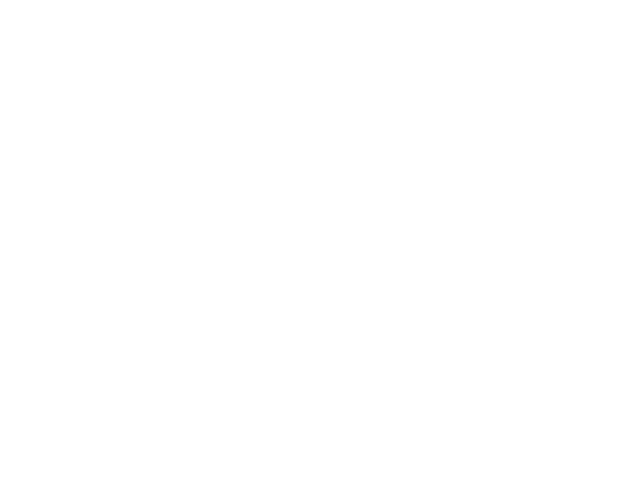

<IPython.core.display.Javascript object>


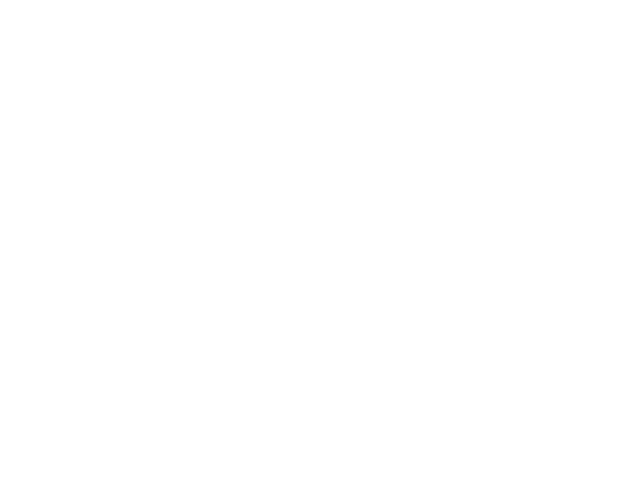

<IPython.core.display.Javascript object>


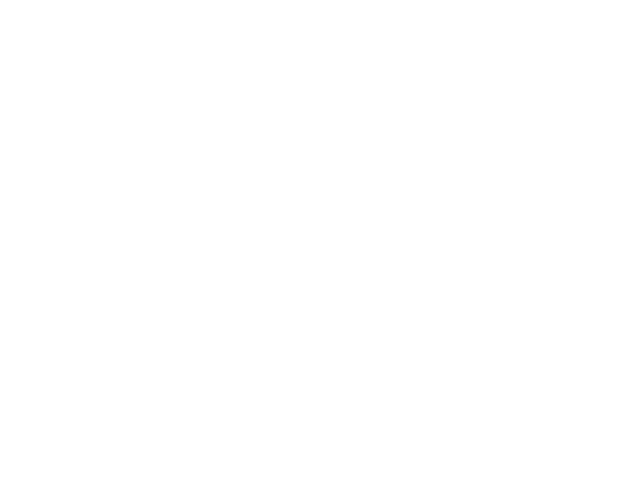

<IPython.core.display.Javascript object>


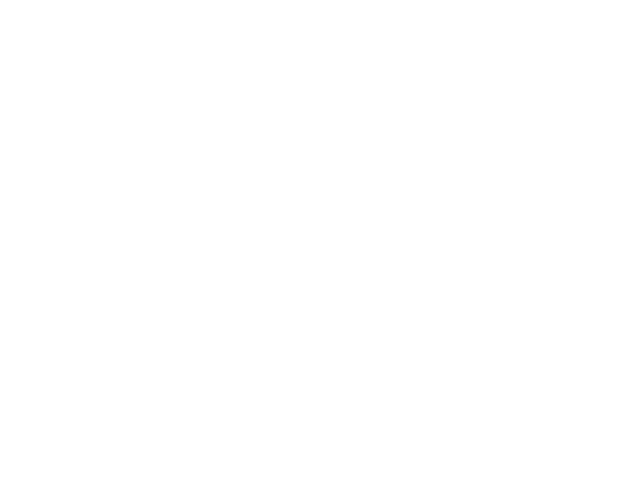

<IPython.core.display.Javascript object>


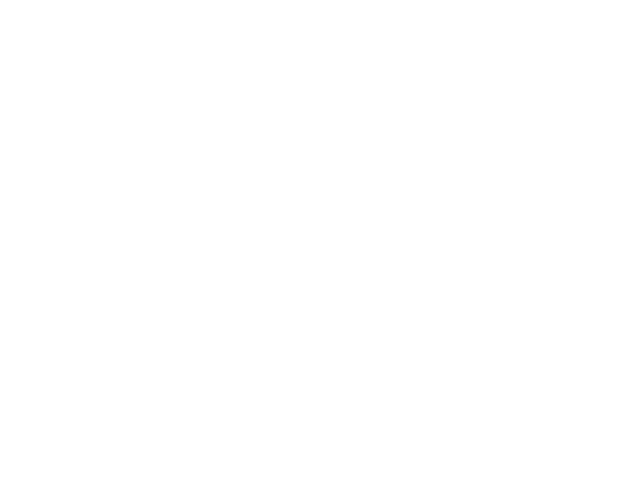

<IPython.core.display.Javascript object>


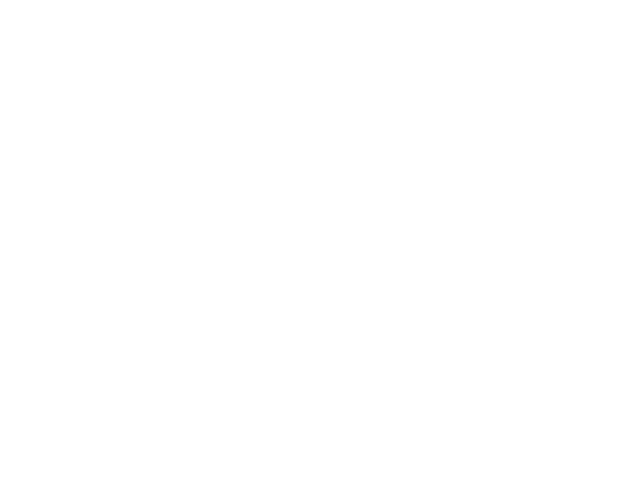

<IPython.core.display.Javascript object>


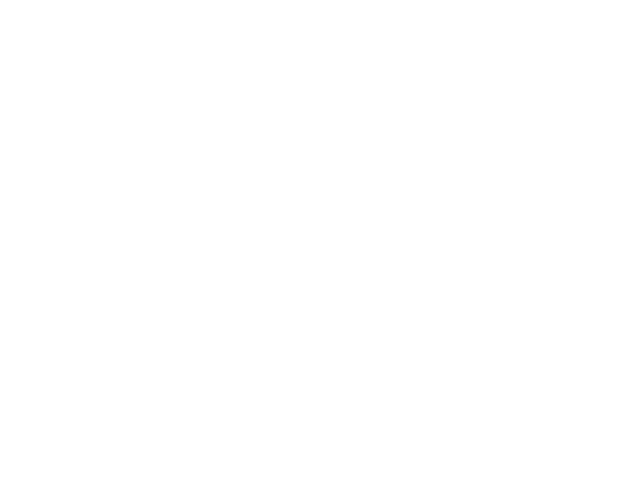

<IPython.core.display.Javascript object>


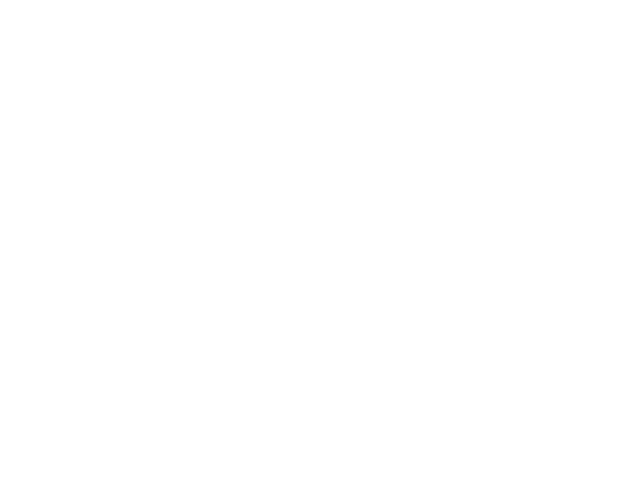

<IPython.core.display.Javascript object>


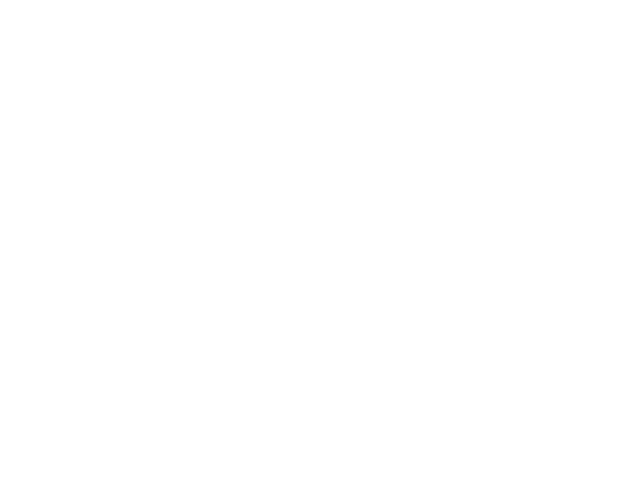

<IPython.core.display.Javascript object>


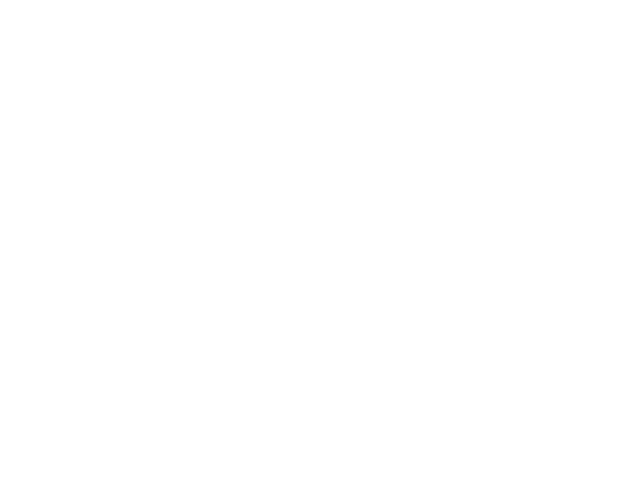

<IPython.core.display.Javascript object>


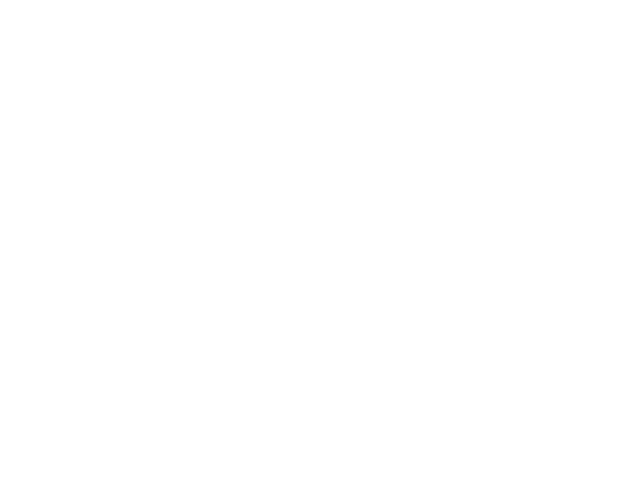

In [26]:
for i in range(counter): # we loop on all the 11 patterns found in the section A
    u_sim=np.dot(M_cameras[i],tp2)# we use the camera matrix of each of the 11 images and multiplie it with our scattered
    # Teapot 3D points
    u_sim = u_sim/u_sim[2,:]
    img=mpimg.imread(valide_images[i])
    #plt.figure()
    plt.imshow(img)
    plt.scatter(u_sim[0,:],u_sim[1,:],s=2)# we scatter the teapot on our picture img
    #plt.show()
    strfile="projections/"+imgname[5:] # we create inside the folder projections the projected teapot on each image.
    plt.savefig(strfile) 
    plt.close()

In [15]:
# Scaling matrix
def scaling_matrix(s):
    # Scales are given in numpy array s
    # s=np.array([s_x,s_y,s_z])
    
    # Write the scaling matrix here
    #******************************
    S = np.identity(4)
    for i in range(3):
        S[i][i] = s[i]
    return S

# Translation matrix
def translation_matrix(t):
    # Translation vector is given in numpy array t
    # t=np.array([t_x,t_y,t_z])
    
    # Write the translation matrix here
    #******************************
    T = np.identity(4)
    T[:3,3] = t
    return T

# Rotation matrix
def rotation_matrix(theta, v):
    # Axis for rotation (unit norm vector) is given 
    # is given in numpy array v
    # v=np.array([v_x,v_y,v_z])
    # Rotation angle is given in theta
    
    # Write the rotation matrix here
    st = np.sin(theta)
    ct = np.cos(theta)
    o_ct = 1-ct
    vx2= v[0]**2
    vy2= v[1]**2
    vz2= v[2]**2
    vxy = v[0]*v[1]
    vxz = v[0]*v[2]
    vyz= v[1]*v[2]
    # Rotation
    R = [[ct+vx2*o_ct, vxy*o_ct-v[2]*st, vxz*o_ct+v[1]*st],
         [vxy*o_ct+v[2]*st, ct+vy2*o_ct, vyz*o_ct-v[0]*st],
         [vxz*o_ct-v[1]*st, vyz*o_ct+v[0]*st, ct+vz2*o_ct]]
    R_v = np.identity(4)
    R_v[:3, :3] = R
    
    return R_v

left\left2.jpg


<IPython.core.display.Javascript object>


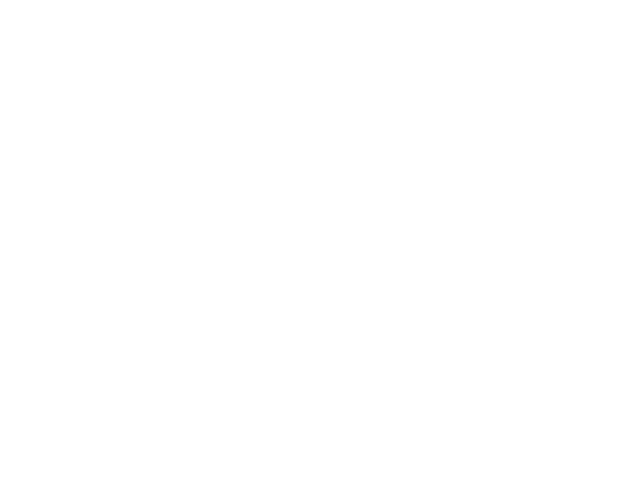

In [16]:
# Update of the scatter plot after transformation
def update_graph(num):
    # Load point cloud from data frame
    angle_trans=num*0.05
    radius=2.5
    
    orig_x = 4.1 # arbitrary value of the origin on the x axis
    orig_y = 1.8 # same
    x = orig_x + np.sin(angle_trans)*radius
    y = orig_y + np.cos(angle_trans)*radius
    
    M = rotation_matrix(angle_trans, np.array([0.0,0.0,1.0]))# rotation around z axis.
    
    M = np.dot(translation_matrix(np.array([x,y,0.0])),M) # circular translation
    
    tp_r = np.dot(M,tp2)
    u_sim=np.dot(M_cameras[i],tp_r)
    u_sim = u_sim/u_sim[2,:]
    ax.clear()
    ax.imshow(img)
    ax.scatter(u_sim[0,:],u_sim[1,:], s=2)

i=4
imgname = valide_images[i]
print(imgname)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
title = ax.set_title('Teapot')
# 2D scatter plot
img=mpimg.imread(imgname)

ani = matplotlib.animation.FuncAnimation(fig, update_graph,1000, interval=1, blit=False)

plt.show()

left\left4.jpg


<IPython.core.display.Javascript object>


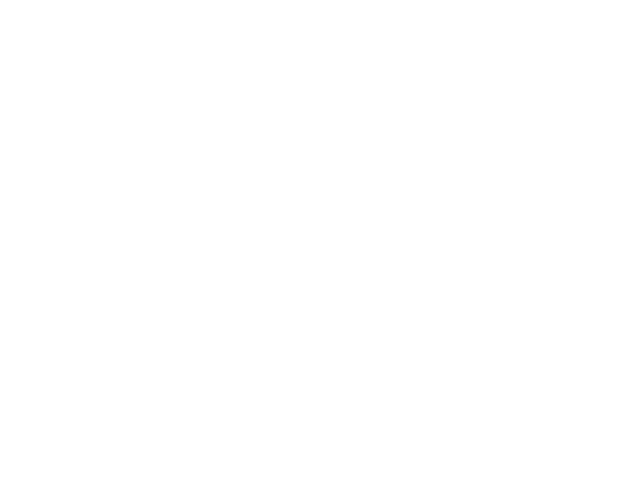

In [17]:
i=6
imgname = valide_images[i]
print(imgname)

fig, ax = plt.subplots()
title = ax.set_title('Teapot')
# 2D scatter plot
img=mpimg.imread(imgname)

ani = matplotlib.animation.FuncAnimation(fig, update_graph,1000, interval=1, blit=False)

plt.show()

In [18]:
i=7
imgname = valide_images[i]
print(imgname)

fig, ax = plt.subplots()
title = ax.set_title('Teapot')
# 2D scatter plot
img=mpimg.imread(imgname)

ani = matplotlib.animation.FuncAnimation(fig, update_graph,1000, interval=1, blit=False)

plt.show()

left\left5.jpg


<IPython.core.display.Javascript object>